# Collider Bias

Here is a simple mnemonic example to illustate the collider or M-bias.

Here the idea is that people who get to Hollywood have to have high congenility = talent + beauty.  Funnily enough this induces a negative correlation between talents and looks, when we condition on the set of actors or celebrities.  This simple example explains an anecdotal observation that "talent and beaty are negatively correlated" for celebrities.  

In [1]:
!pip install pgmpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [2]:
import numpy as np
import statsmodels.formula.api as smf
import networkx as nx
from pgmpy.base.DAG import DAG
from pgmpy.models.BayesianModel import BayesianNetwork
from pgmpy.inference.CausalInference import CausalInference
import pylab as plt

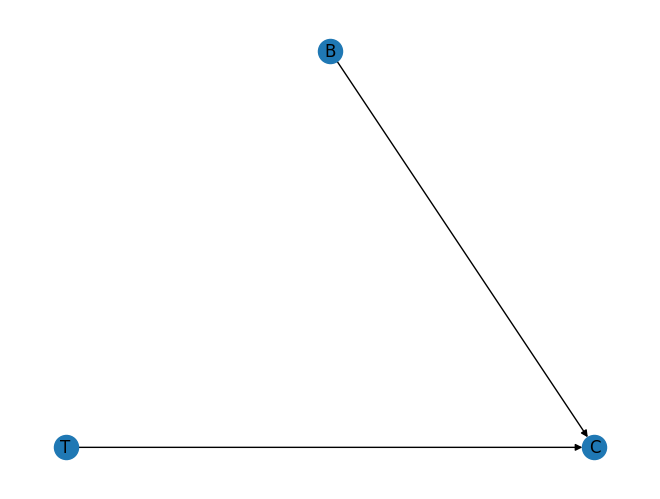

In [22]:
digraph = nx.DiGraph([('T', 'C'),
                      ('B', 'C')])
g = DAG(digraph)

nx.draw_planar(g, with_labels=True)
plt.show()

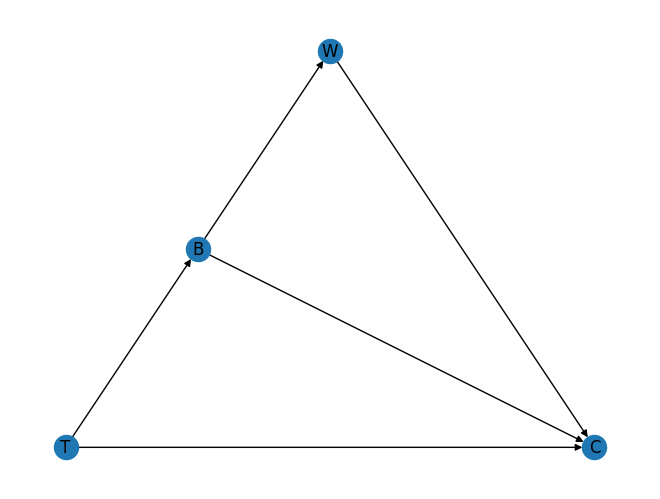

In [23]:
#Testing drawing DAGs
digraph_2 = nx.DiGraph([('T', 'C'),
                      ('B', 'C'),('B','W'),('W','C'),('T','B')])
g_2 = DAG(digraph_2)

nx.draw_planar(g_2, with_labels=True)
plt.show()

We added an additional variable W, for Wealth. Wealth can influence congeniality and is influenced by beauty.

In [4]:
# collider bias
np.random.seed(123)
num_samples = 1000000
talent = np.random.normal(size=num_samples)
beauty = np.random.normal(size=num_samples)
congeniality = talent + beauty + np.random.normal(size=num_samples)  # congeniality
cond_talent = talent[congeniality > 0]
cond_beauty = beauty[congeniality > 0]
data = {"talent": talent, "beauty": beauty, "congeniality": congeniality,
        "cond_talent": cond_talent, "cond_beauty": cond_beauty}

print(smf.ols("talent ~ beauty", data).fit().summary())
print(smf.ols("talent ~ beauty + congeniality", data).fit().summary())
print(smf.ols("cond_talent ~ cond_beauty", data).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                 talent   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.1306
Date:                Wed, 19 Feb 2025   Prob (F-statistic):              0.718
Time:                        23:55:36   Log-Likelihood:            -1.4192e+06
No. Observations:             1000000   AIC:                         2.838e+06
Df Residuals:                  999998   BIC:                         2.838e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0006      0.001      0.629      0.5

# **Summary:**
Congeniality is our collider influenced by both talent and beauty. We ran three regressions to show how conditioning on a collider can distort the relationships between two variables, in this case talent and beauty.

First Regression:
We see that because talent and beauty are independent, beauty has a coefficient close to 0

Second Regression:
We control for congeniality and it now returns a non-zero coefficient for beauty, indicating collider bias exists.

Third Regression:
We condition congeniality > 0, and it shows that talent and beauty are now dependent and there now exists a substantial coefficient of beauty of -.2706.

We can also use package pgmpy to illustrate collider bias, also known as M-bias.

In [14]:
inference = CausalInference(BayesianNetwork(g))
inference.get_all_backdoor_adjustment_sets('B', 'T')
# empty set -- we should not condition on the additional variable C.

frozenset()

In [28]:

inference = CausalInference(BayesianNetwork(g_2))
inference.get_all_backdoor_adjustment_sets('W', 'C')

frozenset({frozenset({'B'})})

For our additional test including variable W, we say in order to get C from W, we should condition on B.